In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%time
df = pd.read_csv("data/train.csv")

Wall time: 8.45 s


In [3]:
df.shape

(200000, 202)

In [153]:
df.describe(percentiles=[])

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [4]:
df.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


Divide features, target and id_code

In [5]:
features = np.array(df)[:,2:]
target = np.array(df["target"]).reshape(-1, 1)
id_code = np.array(df["ID_code"]).reshape(-1, 1)

print("features", features.shape)
print("target", target.shape)
print("id_code", id_code.shape)

features (200000, 200)
target (200000, 1)
id_code (200000, 1)


Datatypes in the dataset

In [6]:
df.dtypes.value_counts()

float64    200
int64        1
object       1
dtype: int64

Min, max and mean among features

In [7]:
print("min:", np.min(features), "max:", np.max(features), "mean:", np.mean(features))

min: -90.2525 max: 74.0321 mean: 6.767448853068574


Check for missing values

In [8]:
df.isnull().sum().sum()/df.shape[0]

0.0

Distribution of target classes

In [9]:
df["target"].value_counts()/df.shape[0]*100

0    89.951
1    10.049
Name: target, dtype: float64

**The data is imbalanced.** This means that metric _accuracy_ means very little here since we have a _classification problem_.

Calculate unique values for features

In [10]:
column_names = df.columns

temp = np.empty((0,3), str)

for column in column_names:
    cnt = len(df[column].unique())
    pct = round(len(df[column].unique())/df.shape[0], 3)
    app = [[column, cnt, pct]]
    temp = np.concatenate((temp, app), axis=0)
    
column_df = pd.DataFrame(temp, columns=["name", "amount", "percentage"])

In [11]:
column_df.sort_values(["percentage"], ascending=True).head(10)

,name,amount,percentage
1,target,2,0.0
70,var_68,451,0.002
93,var_91,7962,0.04
110,var_108,8525,0.043
105,var_103,9376,0.047
14,var_12,9561,0.048
150,var_148,10608,0.053
163,var_161,11071,0.055
73,var_71,13527,0.068
27,var_25,14853,0.074


In [12]:
column_df.sort_values(["percentage"], ascending=True).tail(10)

,name,amount,percentage
138,var_136,156615,0.783
189,var_187,157031,0.785
92,var_90,157210,0.786
122,var_120,158269,0.791
99,var_97,158739,0.794
63,var_61,159369,0.797
76,var_74,161058,0.805
119,var_117,164469,0.822
47,var_45,169968,0.85
0,ID_code,200000,1.0


<hr style="background-color: black;height: 5.0px;"/>
# Prepare train, test and validation sets

In [14]:
from sklearn.model_selection import train_test_split

In [41]:
%%time
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=15, stratify=target)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=15, stratify=y_train)

x_train = np.float64(x_train)
x_val = np.float64(x_val)
x_test = np.float64(x_test)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_val:", y_val.shape)

Shape of x_train: (144000, 200)
Shape of x_test: (40000, 200)
Shape of x_val: (16000, 200)
Shape of y_train: (144000, 1)
Shape of y_test: (40000, 1)
Shape of y_val: (16000, 1)


Scale the data

In [43]:
%%time
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

Wall time: 389 ms


In [44]:
%%time
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

Wall time: 531 ms


<hr style="background-color: black;height: 5.0px;"/>
# Build the NN

In [21]:
def prob_to_class(x, threshold=0.5):
    return np.where(x > threshold, 1, 0)

In [84]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.layers import Dense, Dropout
from tensorflow.keras.constraints import unit_norm, max_norm
from tensorflow.keras import regularizers, initializers

from sklearn.metrics import roc_auc_score

In [85]:
def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

### Accepted model

In [90]:
%%time
print("Size of input dimension:", x_train_scaled.shape[1])
model = Sequential()
model.add(Dense(units=256, input_dim=x_train_scaled.shape[1],
                #kernel_constraint=unit_norm(),
                kernel_regularizer=regularizers.l2(0.001),
                activation="relu"))
model.add(Dropout(rate=0.5)) # 0.2 < dropout < 0.5
model.add(Dense(units=64, input_dim=x_train_scaled.shape[1],
                #kernel_constraint=unit_norm(),
                kernel_regularizer=regularizers.l2(0.001),
                activation="relu"))
model.add(Dropout(rate=0.5)) # 0.2 < dropout < 0.5
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
#model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[auroc])

history = model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val),
                    epochs=500,
                    batch_size=int(x_train_scaled.shape[0]),
                    #batch_size=1024,
                    verbose=2)

Size of input dimension: 200
Train on 144000 samples, validate on 16000 samples
Epoch 1/500
 - 2s - loss: 0.9105 - acc: 0.8984 - val_loss: 0.7197 - val_acc: 0.8995
Epoch 2/500
 - 1s - loss: 0.7195 - acc: 0.8995 - val_loss: 0.6537 - val_acc: 0.8995
Epoch 3/500
 - 1s - loss: 0.6533 - acc: 0.8995 - val_loss: 0.6523 - val_acc: 0.8995
Epoch 4/500
 - 1s - loss: 0.6517 - acc: 0.8995 - val_loss: 0.6671 - val_acc: 0.8995
Epoch 5/500
 - 1s - loss: 0.6664 - acc: 0.8995 - val_loss: 0.6716 - val_acc: 0.8995
Epoch 6/500
 - 1s - loss: 0.6709 - acc: 0.8995 - val_loss: 0.6660 - val_acc: 0.8995
Epoch 7/500
 - 1s - loss: 0.6653 - acc: 0.8995 - val_loss: 0.6550 - val_acc: 0.8995
Epoch 8/500
 - 1s - loss: 0.6543 - acc: 0.8995 - val_loss: 0.6431 - val_acc: 0.8995
Epoch 9/500
 - 1s - loss: 0.6426 - acc: 0.8995 - val_loss: 0.6331 - val_acc: 0.8995
Epoch 10/500
 - 1s - loss: 0.6327 - acc: 0.8995 - val_loss: 0.6257 - val_acc: 0.8995
Epoch 11/500
 - 1s - loss: 0.6253 - acc: 0.8995 - val_loss: 0.6213 - val_acc: 0

Epoch 97/500
 - 1s - loss: 0.4268 - acc: 0.8995 - val_loss: 0.4245 - val_acc: 0.8995
Epoch 98/500
 - 1s - loss: 0.4244 - acc: 0.8995 - val_loss: 0.4221 - val_acc: 0.8995
Epoch 99/500
 - 1s - loss: 0.4220 - acc: 0.8995 - val_loss: 0.4197 - val_acc: 0.8995
Epoch 100/500
 - 1s - loss: 0.4196 - acc: 0.8995 - val_loss: 0.4173 - val_acc: 0.8995
Epoch 101/500
 - 1s - loss: 0.4172 - acc: 0.8995 - val_loss: 0.4149 - val_acc: 0.8995
Epoch 102/500
 - 1s - loss: 0.4148 - acc: 0.8995 - val_loss: 0.4125 - val_acc: 0.8995
Epoch 103/500
 - 1s - loss: 0.4124 - acc: 0.8995 - val_loss: 0.4103 - val_acc: 0.8995
Epoch 104/500
 - 1s - loss: 0.4102 - acc: 0.8995 - val_loss: 0.4081 - val_acc: 0.8995
Epoch 105/500
 - 1s - loss: 0.4080 - acc: 0.8995 - val_loss: 0.4058 - val_acc: 0.8995
Epoch 106/500
 - 1s - loss: 0.4057 - acc: 0.8995 - val_loss: 0.4034 - val_acc: 0.8995
Epoch 107/500
 - 1s - loss: 0.4032 - acc: 0.8995 - val_loss: 0.4012 - val_acc: 0.8996
Epoch 108/500
 - 1s - loss: 0.4011 - acc: 0.8995 - val_lo

Epoch 193/500
 - 1s - loss: 0.3185 - acc: 0.9142 - val_loss: 0.3188 - val_acc: 0.9162
Epoch 194/500
 - 1s - loss: 0.3181 - acc: 0.9136 - val_loss: 0.3185 - val_acc: 0.9163
Epoch 195/500
 - 1s - loss: 0.3177 - acc: 0.9143 - val_loss: 0.3181 - val_acc: 0.9159
Epoch 196/500
 - 1s - loss: 0.3174 - acc: 0.9134 - val_loss: 0.3180 - val_acc: 0.9162
Epoch 197/500
 - 1s - loss: 0.3171 - acc: 0.9144 - val_loss: 0.3176 - val_acc: 0.9161
Epoch 198/500
 - 1s - loss: 0.3170 - acc: 0.9131 - val_loss: 0.3175 - val_acc: 0.9161
Epoch 199/500
 - 1s - loss: 0.3166 - acc: 0.9146 - val_loss: 0.3170 - val_acc: 0.9156
Epoch 200/500
 - 1s - loss: 0.3163 - acc: 0.9127 - val_loss: 0.3163 - val_acc: 0.9158
Epoch 201/500
 - 1s - loss: 0.3154 - acc: 0.9144 - val_loss: 0.3153 - val_acc: 0.9162
Epoch 202/500
 - 1s - loss: 0.3145 - acc: 0.9135 - val_loss: 0.3147 - val_acc: 0.9161
Epoch 203/500
 - 1s - loss: 0.3139 - acc: 0.9142 - val_loss: 0.3144 - val_acc: 0.9161
Epoch 204/500
 - 1s - loss: 0.3136 - acc: 0.9143 - val

Epoch 289/500
 - 1s - loss: 0.2860 - acc: 0.9135 - val_loss: 0.2867 - val_acc: 0.9162
Epoch 290/500
 - 1s - loss: 0.2858 - acc: 0.9146 - val_loss: 0.2860 - val_acc: 0.9165
Epoch 291/500
 - 1s - loss: 0.2852 - acc: 0.9138 - val_loss: 0.2856 - val_acc: 0.9161
Epoch 292/500
 - 1s - loss: 0.2848 - acc: 0.9143 - val_loss: 0.2855 - val_acc: 0.9164
Epoch 293/500
 - 1s - loss: 0.2846 - acc: 0.9145 - val_loss: 0.2854 - val_acc: 0.9163
Epoch 294/500
 - 1s - loss: 0.2846 - acc: 0.9136 - val_loss: 0.2853 - val_acc: 0.9164
Epoch 295/500
 - 1s - loss: 0.2844 - acc: 0.9146 - val_loss: 0.2848 - val_acc: 0.9165
Epoch 296/500
 - 1s - loss: 0.2840 - acc: 0.9139 - val_loss: 0.2844 - val_acc: 0.9161
Epoch 297/500
 - 1s - loss: 0.2836 - acc: 0.9143 - val_loss: 0.2843 - val_acc: 0.9164
Epoch 298/500
 - 1s - loss: 0.2834 - acc: 0.9145 - val_loss: 0.2841 - val_acc: 0.9165
Epoch 299/500
 - 2s - loss: 0.2834 - acc: 0.9138 - val_loss: 0.2840 - val_acc: 0.9163
Epoch 300/500
 - 1s - loss: 0.2831 - acc: 0.9146 - val

Epoch 385/500
 - 1s - loss: 0.2683 - acc: 0.9138 - val_loss: 0.2688 - val_acc: 0.9166
Epoch 386/500
 - 1s - loss: 0.2680 - acc: 0.9145 - val_loss: 0.2686 - val_acc: 0.9158
Epoch 387/500
 - 1s - loss: 0.2678 - acc: 0.9145 - val_loss: 0.2685 - val_acc: 0.9164
Epoch 388/500
 - 1s - loss: 0.2678 - acc: 0.9140 - val_loss: 0.2685 - val_acc: 0.9165
Epoch 389/500
 - 1s - loss: 0.2676 - acc: 0.9146 - val_loss: 0.2682 - val_acc: 0.9161
Epoch 390/500
 - 2s - loss: 0.2674 - acc: 0.9142 - val_loss: 0.2680 - val_acc: 0.9162
Epoch 391/500
 - 1s - loss: 0.2673 - acc: 0.9142 - val_loss: 0.2681 - val_acc: 0.9164
Epoch 392/500
 - 1s - loss: 0.2672 - acc: 0.9146 - val_loss: 0.2678 - val_acc: 0.9164
Epoch 393/500
 - 1s - loss: 0.2670 - acc: 0.9141 - val_loss: 0.2677 - val_acc: 0.9157
Epoch 394/500
 - 1s - loss: 0.2669 - acc: 0.9144 - val_loss: 0.2676 - val_acc: 0.9166
Epoch 395/500
 - 1s - loss: 0.2668 - acc: 0.9145 - val_loss: 0.2675 - val_acc: 0.9164
Epoch 396/500
 - 1s - loss: 0.2667 - acc: 0.9141 - val

Epoch 481/500
 - 1s - loss: 0.2578 - acc: 0.9145 - val_loss: 0.2586 - val_acc: 0.9164
Epoch 482/500
 - 1s - loss: 0.2578 - acc: 0.9141 - val_loss: 0.2588 - val_acc: 0.9164
Epoch 483/500
 - 1s - loss: 0.2579 - acc: 0.9147 - val_loss: 0.2587 - val_acc: 0.9165
Epoch 484/500
 - 1s - loss: 0.2579 - acc: 0.9139 - val_loss: 0.2586 - val_acc: 0.9162
Epoch 485/500
 - 1s - loss: 0.2577 - acc: 0.9147 - val_loss: 0.2582 - val_acc: 0.9159
Epoch 486/500
 - 1s - loss: 0.2574 - acc: 0.9142 - val_loss: 0.2581 - val_acc: 0.9160
Epoch 487/500
 - 1s - loss: 0.2573 - acc: 0.9144 - val_loss: 0.2582 - val_acc: 0.9162
Epoch 488/500
 - 1s - loss: 0.2574 - acc: 0.9147 - val_loss: 0.2581 - val_acc: 0.9162
Epoch 489/500
 - 1s - loss: 0.2574 - acc: 0.9140 - val_loss: 0.2582 - val_acc: 0.9162
Epoch 490/500
 - 1s - loss: 0.2573 - acc: 0.9147 - val_loss: 0.2579 - val_acc: 0.9163
Epoch 491/500
 - 1s - loss: 0.2571 - acc: 0.9141 - val_loss: 0.2578 - val_acc: 0.9164
Epoch 492/500
 - 1s - loss: 0.2570 - acc: 0.9145 - val

### Deeper Neural Network

In [148]:
%%time
print("Size of input dimension:", x_train_scaled.shape[1])
model = Sequential()
model.add(Dense(units=256, input_dim=x_train_scaled.shape[1],
                kernel_regularizer=regularizers.l2(0.01),
                activation="relu"))
model.add(Dropout(rate=0.5)) # 0.2 < dropout < 0.5
'''
model.add(Dense(units=256, input_dim=x_train_scaled.shape[1],
                kernel_regularizer=regularizers.l2(0.01),
                activation="relu"))
model.add(Dropout(rate=0.5)) # 0.2 < dropout < 0.5

model.add(Dense(units=128, input_dim=x_train_scaled.shape[1],
                kernel_regularizer=regularizers.l2(0.01),
                activation="relu"))
model.add(Dropout(rate=0.5)) # 0.2 < dropout < 0.5
model.add(Dense(units=128, input_dim=x_train_scaled.shape[1],
                kernel_regularizer=regularizers.l2(0.01),
                activation="relu"))
model.add(Dropout(rate=0.5)) # 0.2 < dropout < 0.5

model.add(Dense(units=64, input_dim=x_train_scaled.shape[1],
                kernel_regularizer=regularizers.l2(0.01),
                activation="relu"))
model.add(Dropout(rate=0.5)) # 0.2 < dropout < 0.5
model.add(Dense(units=64, input_dim=x_train_scaled.shape[1],
                kernel_regularizer=regularizers.l2(0.01),
                activation="relu"))
model.add(Dropout(rate=0.5)) # 0.2 < dropout < 0.5

model.add(Dense(units=32, input_dim=x_train_scaled.shape[1],
                kernel_regularizer=regularizers.l2(0.01),
                activation="relu"))
model.add(Dropout(rate=0.5)) # 0.2 < dropout < 0.5
model.add(Dense(units=32, input_dim=x_train_scaled.shape[1],
                kernel_regularizer=regularizers.l2(0.01),
                activation="relu"))
model.add(Dropout(rate=0.5)) # 0.2 < dropout < 0.5
'''
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

history = model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val),
                    epochs=20,
                    batch_size=int(x_train_scaled.shape[0]),
                    #batch_size=1024,
                    verbose=2)

Size of input dimension: 200
Train on 144000 samples, validate on 16000 samples
Epoch 1/20
 - 3s - loss: 3.1795 - acc: 0.1005 - val_loss: 2.7239 - val_acc: 0.8995
Epoch 2/20
 - 1s - loss: 2.7244 - acc: 0.8995 - val_loss: 2.5496 - val_acc: 0.8995
Epoch 3/20
 - 1s - loss: 2.5497 - acc: 0.8995 - val_loss: 2.5158 - val_acc: 0.8995
Epoch 4/20
 - 2s - loss: 2.5156 - acc: 0.8995 - val_loss: 2.5195 - val_acc: 0.8995
Epoch 5/20
 - 2s - loss: 2.5191 - acc: 0.8995 - val_loss: 2.5223 - val_acc: 0.8995
Epoch 6/20
 - 2s - loss: 2.5219 - acc: 0.8995 - val_loss: 2.5153 - val_acc: 0.8995
Epoch 7/20
 - 2s - loss: 2.5148 - acc: 0.8995 - val_loss: 2.4978 - val_acc: 0.8995
Epoch 8/20
 - 2s - loss: 2.4973 - acc: 0.8995 - val_loss: 2.4715 - val_acc: 0.8995
Epoch 9/20
 - 1s - loss: 2.4710 - acc: 0.8995 - val_loss: 2.4384 - val_acc: 0.8995
Epoch 10/20
 - 2s - loss: 2.4379 - acc: 0.8995 - val_loss: 2.4004 - val_acc: 0.8995
Epoch 11/20
 - 1s - loss: 2.3999 - acc: 0.8995 - val_loss: 2.3592 - val_acc: 0.8995
Epoch

Evaluate

In [144]:
result = model.evaluate(x_test_scaled, y_test)
for i in range(len(model.metrics_names)):
    print("Metric", model.metrics_names[i],":",str(round(result[i], 4)))

40000/40000 [==============================] - 2s 43us/step
Metric loss : 0.3268
Metric acc : 0.8996


In [145]:
probability_x_test =  model.predict(x_test_scaled)
res_df = pd.DataFrame(np.concatenate((probability_x_test, prob_to_class(probability_x_test, 0.5), y_test), axis=1), columns=["probability", "predicted", "target"])
print(res_df.dtypes)
print(res_df["predicted"].value_counts()/res_df.shape[0]*100)
print(res_df["target"].value_counts()/res_df.shape[0]*100)
res_df.head(5)

probability    float64
predicted      float64
target         float64
dtype: object
0.0    99.9925
1.0     0.0075
Name: predicted, dtype: float64
0.0    89.95
1.0    10.05
Name: target, dtype: float64


,probability,predicted,target
0,0.129370,0.0,0.0
1,0.080522,0.0,0.0
2,0.077760,0.0,0.0
3,0.031475,0.0,0.0
4,0.084385,0.0,0.0


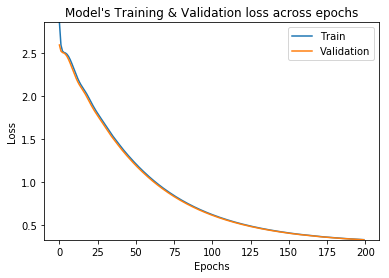

In [146]:
max_loss = np.max(history.history["loss"])
min_loss = np.min(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.ylim(min_loss, max_loss)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

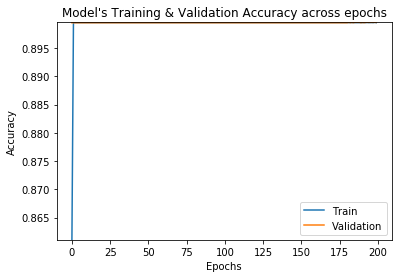

In [147]:
min_acc = np.min(model.history.history['acc'])
max_acc = np.max(model.history.history['val_acc'])
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title("Model's Training & Validation Accuracy across epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.ylim(min_acc, max_acc)
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

<hr style="background-color: black;height: 5.0px;"/>
## ROC

In [28]:
from sklearn.metrics import roc_auc_score

In [129]:
%%time
roc_score = roc_auc_score(y_test, probability_x_test)

print(roc_score)

0.8591282677772891
Wall time: 43.5 ms


<hr style="background-color: black;height: 5.0px;"/>
## Submission of results

In [53]:
test = pd.read_csv("data/test.csv")

In [54]:
test.shape

(200000, 201)

In [55]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [56]:
%%time

test_features = np.array(test)[:,1:]
result_df = pd.DataFrame(test["ID_code"])

print("test_features shape", test_features.shape)
print("result_df shape", result_df.shape)

test_features shape (200000, 200)
result_df shape (200000, 1)
Wall time: 11.6 s


Scale the data

In [57]:
%%time
test_scaled = scaler.transform(test_features)

Wall time: 1.15 s


In [58]:
pd.DataFrame(test_scaled).head(5)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.535360,0.897837,0.628717,0.715833,0.548256,0.607399,0.574061,0.578182,0.601954,0.666409,...,0.365097,0.749230,0.195180,0.456168,0.266369,0.810571,0.566680,0.788006,0.464797,0.447387
1,0.408005,0.641132,0.533050,0.395056,0.355501,0.574572,0.601977,0.594479,0.276928,0.259747,...,0.758807,0.593904,0.389199,0.719905,0.365408,0.601884,0.385026,0.647505,0.650104,0.265418
2,0.254905,0.184314,0.465517,0.535820,0.447373,0.852630,0.417628,0.667081,0.571650,0.599619,...,0.408475,0.705125,0.474327,0.446866,0.227615,0.775034,0.210427,0.182324,0.688933,0.232704
3,0.408357,0.539775,0.574667,0.500064,0.325182,0.719189,0.424956,0.681060,0.663605,0.472520,...,0.726554,0.606357,0.447945,0.495003,0.344749,0.883857,0.553991,0.541227,0.340380,0.514331
4,0.567520,0.586569,0.696941,0.588941,0.347404,0.482541,0.739656,0.235211,0.644417,0.427482,...,0.561812,0.611288,0.417291,0.488013,0.576606,0.521822,0.270891,0.219809,0.386450,0.440485


Convert probability to class

In [59]:
%%time
result_df['probability'] = np.round(model.predict(test_scaled), 1)
result_df['classification'] = prob_to_class(x=result_df['probability'], threshold=0.5)

print(result_df.head(5))

  ID_code  probability  classification
0  test_0          0.2               0
1  test_1          0.2               0
2  test_2          0.1               0
3  test_3          0.2               0
4  test_4          0.1               0
Wall time: 2.68 s


In [60]:
result_df['classification'].value_counts()/result_df.shape[0]*100

0    98.282
1     1.718
Name: classification, dtype: float64

In [61]:
import time

t = time.localtime()
timestamp = time.strftime('%Y%m%d_%H%M', t)
save_filename = ("score/result-" + timestamp + ".csv")

result_df = result_df.rename(columns={'probability': 'target'}) # rename to match submission criteria
result_df[['ID_code', 'target']].to_csv(save_filename, index=False)